https://www.kaggle.com/code/grigol1/applying-lstm-to-sentiment-analysis-imdb-reviews/notebook

---

## Welcome!

Hey there! In this notebook, we're going to tackle movie review sentiment analysis. What's that? Well, we're trying to figure out whether a movie review is positive or negative. 

We're using a cool kind of AI model called an LSTM, which is really good at understanding sequences - like sentences in a review. 

We've got a bunch of steps to get through - cleaning up our text data, splitting it into chunks, getting it ready for the model, and then the fun part: training our model!

Once we've got a trained model, we'll put it to the test and see how well it can classify our movie reviews. 

Ready? Let's go!

## Part 1: Importing necessary libraries

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import warnings

warnings.filterwarnings("ignore")

## Part 2: Load and preprocess the data

In [ ]:
# Load the dataset
# Please replace the path with the actual path to the IMDB dataset
data = pd.read_csv("./IMDB Dataset.csv")

# import nltk
# nltk.download('stopwords')

# Text preprocessing
STOPWORDS = set(stopwords.words("english"))


def clean_text(text):
    text = text.lower()  # lowercase text
    text = " ".join(
        word for word in text.split() if word not in STOPWORDS
    )  # remove stopwords from text
    text = re.sub(r"\W", " ", text)  # Remove all the special characters
    text = re.sub(r"\s+[a-zA-Z]\s+", " ", text)  # remove all single characters
    text = re.sub(
        r"\^[a-zA-Z]\s+", " ", text
    )  # Remove single characters from the start
    text = re.sub(
        r"\s+", " ", text, flags=re.I
    )  # Substituting multiple spaces with single space
    return text


data["review"] = data["review"].apply(clean_text)

We load the dataset using pandas and preprocess it using our clean_text function that removes stopwords, special characters, single characters and multiple spaces.

## Part 3: Tokenization and sequence padding

In [11]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(
    num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True
)
tokenizer.fit_on_texts(data["review"].values)
word_index = tokenizer.word_index
print("Found %s unique tokens." % len(word_index))

X = tokenizer.texts_to_sequences(data["review"].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print("Shape of data tensor:", X.shape)

Found 101702 unique tokens.
Shape of data tensor: (50000, 250)


We tokenize the cleaned texts and convert them into sequences of numbers. We then pad the sequences to make them of equal length.

## Part 4: Preparing the labels and splitting the data into training and testing sets

In [12]:
# Converting categorical labels to numbers.
Y = pd.get_dummies(data["sentiment"]).values
print("Shape of label tensor:", Y.shape)

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

Shape of label tensor: (50000, 2)
(40000, 250) (40000, 2)
(10000, 250) (10000, 2)


We convert the categorical labels into numerical form using one-hot encoding and then split our data into a training set and a testing set.


## Part 5: Define and train the model

In [13]:
# Define LSTM model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

# Train the model
epochs = 5
batch_size = 64

history = model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 131s 230ms/step - accuracy: 0.7628 - loss: 0.4779 - val_accuracy: 0.8758 - val_loss: 0.3019
Epoch 2/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 126s 225ms/step - accuracy: 0.9170 - loss: 0.2246 - val_accuracy: 0.8662 - val_loss: 0.3653
Epoch 3/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 125s 222ms/step - accuracy: 0.9475 - loss: 0.1459 - val_accuracy: 0.8683 - val_loss: 0.3452
Epoch 4/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 131s 233ms/step - accuracy: 0.9597 - loss: 0.1165 - val_accuracy: 0.8717 - val_loss: 0.4179
Epoch 5/5
563/563 ━━━━━━━━━━━━━━━━━━━━ 130s 230ms/step - accuracy: 0.9757 - loss: 0.0731 - val_accuracy: 0.8643 - val_loss: 0.3912


We define an LSTM model, compile it, and then train it using our training data.

## Part 6: Validate the model

In [14]:
# Validate the model
accr = model.evaluate(X_test, Y_test)
print("Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}".format(accr[0], accr[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.8743 - loss: 0.3498
Test set
  Loss: 0.362
  Accuracy: 0.876


## Conclusion

Nice job, we made it! We took a ton of IMDB movie reviews, cleaned them up, and trained an LSTM model to figure out if they were positive or negative. Pretty cool, right?

Our model did pretty well, but there's always room for improvement. Maybe we can tweak some settings, add more layers, or even use a different type of model. Plus, we can always use more or different data to train on.

Remember, what matters most is not just the final accuracy number, but understanding what's happening along the way. Don't be afraid to play around with the code and try new things. Happy coding!

아래는 테스트를 위한 코드

In [15]:
# 전체 모델 저장 (모델 아키텍처 + 가중치 + 옵티마이저 상태)
model.save("model_name.h5")  # HDF5 파일로 저장

In [16]:
from tensorflow.keras.models import load_model

# 전체 모델 불러오기
loaded_model = load_model("model_name.h5")

In [17]:
# Validate the model
accr = loaded_model.evaluate(X_test, Y_test)
print("Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}".format(accr[0], accr[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8743 - loss: 0.3498
Test set
  Loss: 0.362
  Accuracy: 0.876


In [21]:
# 예측 값 계산
predictions = loaded_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# 실제 값과 예측 값 비교
for i in range(10):  # 상위 10개 샘플만 출력
    print(f"Sample {i+1}:")
    print(f"  Actual: {true_classes[i]}")
    print(f"  Predicted: {predicted_classes[i]}")
    # print(f"  Review: {data['review'].iloc[X_test.index[i]]}")
    print("-" * 50)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Sample 1:
  Actual: 1
  Predicted: 0
--------------------------------------------------
Sample 2:
  Actual: 1
  Predicted: 1
--------------------------------------------------
Sample 3:
  Actual: 0
  Predicted: 0
--------------------------------------------------
Sample 4:
  Actual: 1
  Predicted: 1
--------------------------------------------------
Sample 5:
  Actual: 0
  Predicted: 0
--------------------------------------------------
Sample 6:
  Actual: 1
  Predicted: 1
--------------------------------------------------
Sample 7:
  Actual: 1
  Predicted: 1
--------------------------------------------------
Sample 8:
  Actual: 1
  Predicted: 0
--------------------------------------------------
Sample 9:
  Actual: 0
  Predicted: 1
--------------------------------------------------
Sample 10:
  Actual: 0
  Predicted: 0
--------------------------------------------------


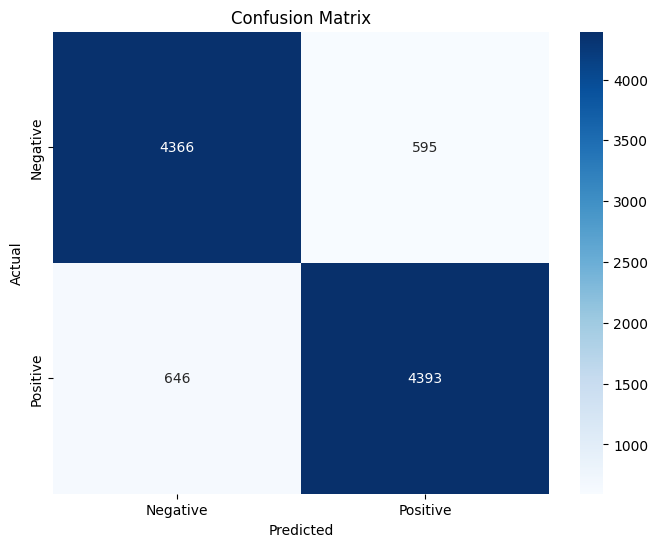

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 혼동 행렬 계산
cm = confusion_matrix(true_classes, predicted_classes)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Negative", "Positive"],
    yticklabels=["Negative", "Positive"],
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()